<a href="https://colab.research.google.com/github/Hizbucodes/2nd-Year-Data-Science-Course-Work/blob/main/KAHDSE221F_014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01) Loading the Dataset into pandas DataFrame

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
breast_cancer_df = pd.read_excel('/content/breast_cancer (1).xlsx', header = 0)

breast_cancer_df

,SubjectNo,PatientID,Age,Weight,Height,Parity,NoOfChildren,MenopausalStatus,AgeAtMenarche,AgeAtMenopause,UseOfHRT,FamilyHystory,Binary
0,1,CP_01,40,50.00,1.65,Parouse,2,Premenopausal,13,NaN,No,No,0
1,2,CP_02,55,70.20,1.58,Parouse,3,Postmenopausal,14,42.0,No,No,0
2,3,CP_03,51,41.25,1.46,Parouse,2,Premenopausal,14,NaN,No,No,1
3,4,CP_04,45,70.50,1.64,Parouse,1,Premenopausal,14,NaN,No,No,1
4,5,CP_05,50,60.90,1.49,Parouse,3,Premenopausal,12,NaN,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,NW_42,65,70.00,1.50,Parouse,2,Postmenopausal,13,51.0,No,No,0
239,240,NW_43,55,56.00,1.52,Nulliparouse,0,Postmenopausal,12,41.0,No,No,0
240,241,NW_44,40,65.00,1.48,Parouse,2,Postmenopausal,12,35.0,No,No,0
241,242,NW_45,45,53.00,1.40,Parouse,3,Premenopausal,12,NaN,Yes,No,1


# 02) Preprocess data considering you are going for a machine Learning-based classification.

In [ ]:
breast_cancer_df.isnull().sum()

SubjectNo             0
PatientID             0
Age                   0
Weight                0
Height                0
Parity                0
NoOfChildren          0
MenopausalStatus      0
AgeAtMenarche         0
AgeAtMenopause      114
UseOfHRT              0
FamilyHystory         0
Binary                0
dtype: int64

In [ ]:
breast_cancer_df['AgeAtMenopause'].fillna(breast_cancer_df['AgeAtMenopause'].median(), inplace=True)

In [ ]:
breast_cancer_df.isnull().sum()

SubjectNo           0
PatientID           0
Age                 0
Weight              0
Height              0
Parity              0
NoOfChildren        0
MenopausalStatus    0
AgeAtMenarche       0
AgeAtMenopause      0
UseOfHRT            0
FamilyHystory       0
Binary              0
dtype: int64

<Axes: >

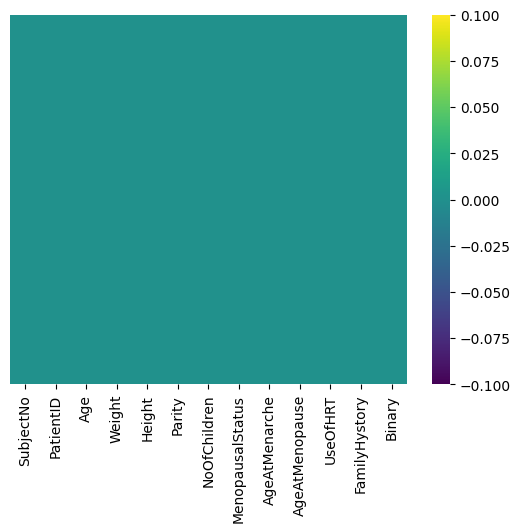

In [ ]:
sns.heatmap(breast_cancer_df.isnull(),yticklabels=False,cmap='viridis')

In [ ]:
breast_cancer_df['MenopausalStatus'].unique()

array(['Premenopausal', 'Postmenopausal'], dtype=object)

In [ ]:
breast_cancer_df['FamilyHystory'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
breast_cancer_df['UseOfHRT'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
breast_cancer_df = pd.get_dummies(breast_cancer_df, columns=['MenopausalStatus'], drop_first=True)
breast_cancer_df = pd.get_dummies(breast_cancer_df, columns=['Parity'], drop_first=True)
breast_cancer_df = pd.get_dummies(breast_cancer_df, columns=['UseOfHRT'], drop_first=True)
breast_cancer_df = pd.get_dummies(breast_cancer_df, columns=['FamilyHystory'], drop_first=True)

In [ ]:
breast_cancer_df.drop(['SubjectNo'],axis=1,inplace=True)

In [ ]:
breast_cancer_df.count()

PatientID                         243
Age                               243
Weight                            243
Height                            243
NoOfChildren                      243
AgeAtMenarche                     243
AgeAtMenopause                    243
Binary                            243
MenopausalStatus_Premenopausal    243
Parity_Parouse                    243
UseOfHRT_Yes                      243
FamilyHystory_Yes                 243
dtype: int64

# 03) Conduct a comprehensive EDA.

In [ ]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PatientID                       243 non-null    object 
 1   Age                             243 non-null    int64  
 2   Weight                          243 non-null    float64
 3   Height                          243 non-null    float64
 4   NoOfChildren                    243 non-null    int64  
 5   AgeAtMenarche                   243 non-null    int64  
 6   AgeAtMenopause                  243 non-null    float64
 7   Binary                          243 non-null    int64  
 8   MenopausalStatus_Premenopausal  243 non-null    uint8  
 9   Parity_Parouse                  243 non-null    uint8  
 10  UseOfHRT_Yes                    243 non-null    uint8  
 11  FamilyHystory_Yes               243 non-null    uint8  
dtypes: float64(3), int64(4), object(1), 

In [ ]:
breast_cancer_df.describe()

,Age,Weight,Height,NoOfChildren,AgeAtMenarche,AgeAtMenopause,Binary,MenopausalStatus_Premenopausal,Parity_Parouse,UseOfHRT_Yes,FamilyHystory_Yes
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,51.584362,61.865144,1.541564,2.205761,13.456790,48.572016,0.185185,0.473251,0.913580,0.086420,0.156379
std,8.928324,11.042376,0.082722,1.142189,1.502472,3.291292,0.389249,0.500314,0.281563,0.281563,0.363964
min,35.000000,32.550000,1.220000,0.000000,10.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,53.875000,1.495000,2.000000,12.000000,48.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,51.000000,61.000000,1.530000,2.000000,13.000000,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,58.000000,69.035000,1.580000,3.000000,14.000000,49.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,78.000000,106.000000,1.990000,6.000000,18.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'NoOfChildren'}>,
        <Axes: title={'center': 'AgeAtMenarche'}>,
        <Axes: title={'center': 'AgeAtMenopause'}>],
       [<Axes: title={'center': 'Binary'}>,
        <Axes: title={'center': 'MenopausalStatus_Premenopausal'}>,
        <Axes: title={'center': 'Parity_Parouse'}>],
       [<Axes: title={'center': 'UseOfHRT_Yes'}>,
        <Axes: title={'center': 'FamilyHystory_Yes'}>, <Axes: >]],
      dtype=object)

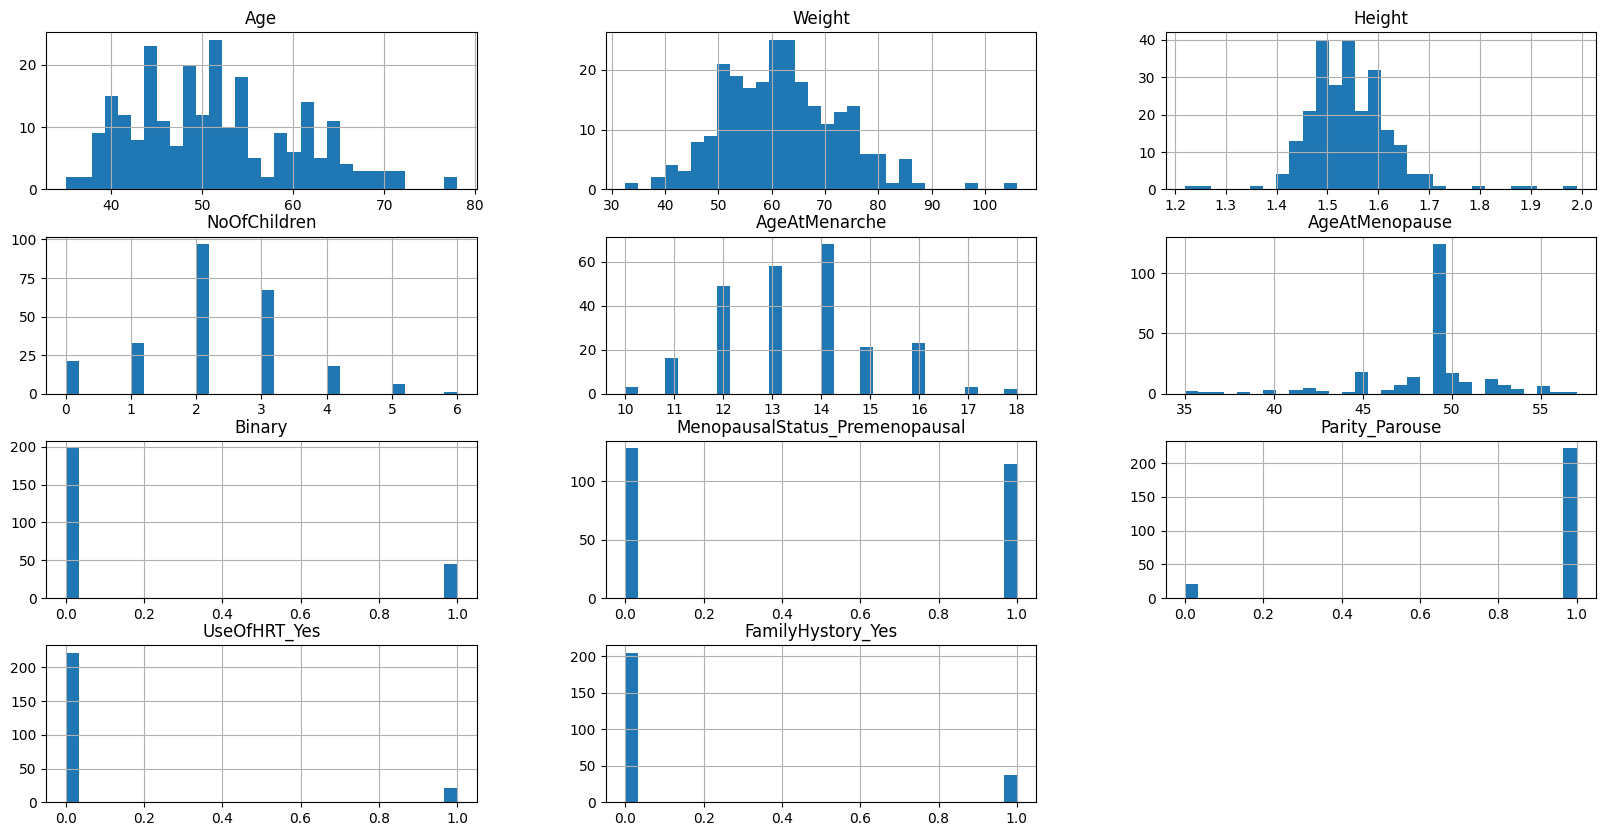

In [ ]:
breast_cancer_df.hist(bins = 30, figsize = (20, 10))

In [ ]:
column_name = ['Age', 'Weight', 'Height', 'NoOfChildren', 'AgeAtMenarche', 'AgeAtMenopause']

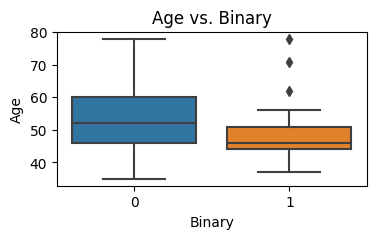

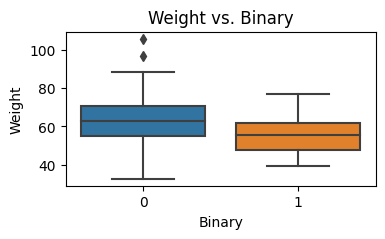

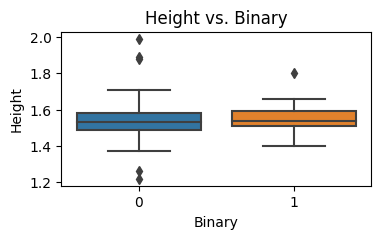

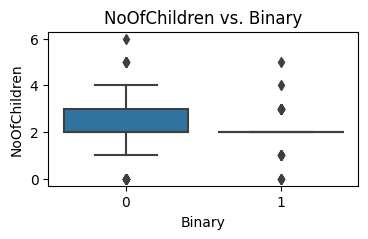

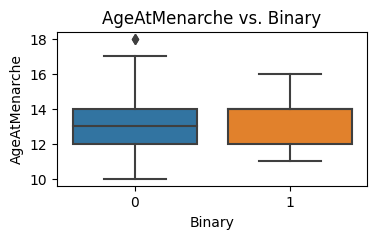

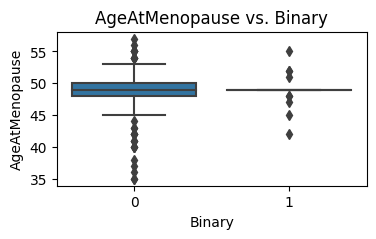

In [ ]:
for feature in column_name:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=breast_cancer_df, x='Binary', y=feature)
    plt.title(f'{feature} vs. Binary')
    plt.show()

In [ ]:
breast_cancer_df.drop_duplicates(inplace=True)

# 04) Use Logistic Regression, Naive Bayes, Decision Tree and Kneighbors classifier to classify the cancer dataset.

In [ ]:
breast_cancer_df['Binary'].value_counts()

0    198
1     45
Name: Binary, dtype: int64

<Axes: ylabel='Binary'>

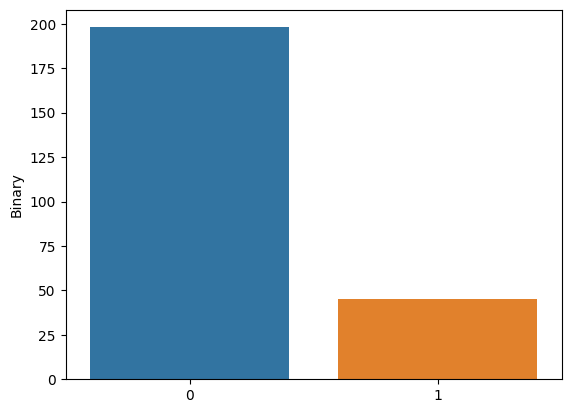

In [ ]:
sns.barplot(x=breast_cancer_df.Binary.value_counts().index,y=breast_cancer_df.Binary.value_counts())

In [ ]:
X=breast_cancer_df.drop(columns=['Binary','PatientID'],axis=1)
y=breast_cancer_df['Binary']

In [ ]:
X

,Age,Weight,Height,NoOfChildren,AgeAtMenarche,AgeAtMenopause,MenopausalStatus_Premenopausal,Parity_Parouse,UseOfHRT_Yes,FamilyHystory_Yes
0,40,50.00,1.65,2,13,49.0,1,1,0,0
1,55,70.20,1.58,3,14,42.0,0,1,0,0
2,51,41.25,1.46,2,14,49.0,1,1,0,0
3,45,70.50,1.64,1,14,49.0,1,1,0,0
4,50,60.90,1.49,3,12,49.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
238,65,70.00,1.50,2,13,51.0,0,1,0,0
239,55,56.00,1.52,0,12,41.0,0,0,0,0
240,40,65.00,1.48,2,12,35.0,0,1,0,0
241,45,53.00,1.40,3,12,49.0,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

lr_classifier=LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train,y_train)

print(lr_classifier.fit(X_train,y_train))
y_pred=lr_classifier.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

LogisticRegression(max_iter=1000)
[[42  1]
 [ 4  2]]
0.8979591836734694
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.67      0.33      0.44         6

    accuracy                           0.90        49
   macro avg       0.79      0.66      0.69        49
weighted avg       0.88      0.90      0.88        49



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)

print(nb_classifier.fit(X_train,y_train))

y_pred=nb_classifier.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

GaussianNB()
[[39  4]
 [ 4  2]]
0.8367346938775511
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.33      0.33      0.33         6

    accuracy                           0.84        49
   macro avg       0.62      0.62      0.62        49
weighted avg       0.84      0.84      0.84        49



**Decisiion Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
dt_classifier.fit(X_train,y_train)

print(dt_classifier.fit(X_train,y_train))

y_pred=dt_classifier.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

DecisionTreeClassifier(criterion='entropy', random_state=42)
[[37  6]
 [ 5  1]]
0.7755102040816326
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.14      0.17      0.15         6

    accuracy                           0.78        49
   macro avg       0.51      0.51      0.51        49
weighted avg       0.79      0.78      0.78        49



**Kneighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_classifier=KNeighborsClassifier(n_neighbors=3)
kn_classifier.fit(X_train,y_train)

print(kn_classifier.fit(X_train,y_train))

y_pred=kn_classifier.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,zero_division='warn'))

KNeighborsClassifier(n_neighbors=3)
[[41  2]
 [ 5  1]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.33      0.17      0.22         6

    accuracy                           0.86        49
   macro avg       0.61      0.56      0.57        49
weighted avg       0.82      0.86      0.84        49



# 05) Optimize hyperparameters to obtain the best classifier and discuss your answers.

In [ ]:
import sklearn.metrics

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred,zero_division=1))
    print('Recall:\n',metrics.recall_score(y_test, y_pred,zero_division=1))

**Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression


lr_classifier = LogisticRegression(max_iter=1000)
lr_C = np.array([0.01, 0.1, 1, 10, 100])
lr_penalty = ['l2', 'none']
lr_solver = [ 'lbfgs']


grid_values = {
    'C': lr_C,
    'penalty': lr_penalty,
    'solver': lr_solver
}

cross_validation = KFold(n_splits=5, shuffle=False)
lrc_grid = GridSearchCV(lr_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro', verbose=1)

desc = lrc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(lrc_grid, X_test, y_test)

print("\n The best parameters across all the searched params:\n", lrc_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2', 'none'], 'solver': ['lbfgs']},
             scoring='f1_macro', verbose=1)
Accuracy score:
 0.8979591836734694
Confusion matrix:
 [[42  1]
 [ 4  2]]
Classification report:
               precision    recall  f1-score   support

           0     0.9130    0.9767    0.9438        43
           1     0.6667    0.3333    0.4444         6

    accuracy                         0.8980        49
   macro avg     0.7899    0.6550    0.6941        49
weighted avg     0.8829    0.8980    0.8827        49

Precision:
 0.6666666666666666
Recall:
 0.3333333333333333

 The best parameters across all the searched params:
 {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


**Naive Bayes**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()
grid_values = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

cross_validation = KFold(n_splits=5, shuffle=False)
nbc_grid = GridSearchCV(nb_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro', verbose=1)

desc = nbc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(nbc_grid, X_test, y_test)

print("\n The best parameters across all the searched params:\n", nbc_grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='f1_macro', verbose=1)
Accuracy score:
 0.8367346938775511
Confusion matrix:
 [[39  4]
 [ 4  2]]
Classification report:
               precision    recall  f1-score   support

           0     0.9070    0.9070    0.9070        43
           1     0.3333    0.3333    0.3333         6

    accuracy                         0.8367        49
   macro avg     0.6202    0.6202    0.6202        49
weighted avg     0.8367    0.8367    0.8367        49

Precision:
 0.3333333333333333
Recall:
 0.3333333333333333

 The best parameters across all the searched params:
 {'var_smoothing': 1e-09}


**Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier


dt_classifier = DecisionTreeClassifier()
dt_criterion = ['gini', 'entropy']
dt_max_depth = [None, 10, 20, 30, 40, 50]
dt_min_samples_split = [2, 5, 10]
dt_min_samples_leaf = [1, 2, 4]

grid_values = {
    'criterion': dt_criterion,
    'max_depth': dt_max_depth,
    'min_samples_split': dt_min_samples_split,
    'min_samples_leaf': dt_min_samples_leaf
}

cross_validation = KFold(n_splits=5, shuffle=True)
dtc_grid = GridSearchCV(dt_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro', verbose=1)

desc = dtc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(dtc_grid, X_test, y_test)

print("\n The best parameters across all the searched params:\n", dtc_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro', verbose=1)
Accuracy score:
 0.8367346938775511
Confusion matrix:
 [[40  3]
 [ 5  1]]
Classification report:
               precision    recall  f1-score   support

           0     0.8889    0.9302    0.9091        43
           1     0.2500    0.1667    0.2000         6

    accuracy                         0.8367        49
   macro avg     0.5694    0.5484    0.5545        49
weighted avg     0.8107    0.8367    0.8223        49

Precision:
 0.25
Recall:
 0.16666666666666666

 The best parameters across all the searched params:


**Kneighbors Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier


kn_classifier = KNeighborsClassifier()
kn_n_neighbors = [3, 5, 7, 9]
kn_weights = ['uniform', 'distance']
kn_algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']

grid_values = {
    'n_neighbors': kn_n_neighbors,
    'weights': kn_weights,
    'algorithm': kn_algorithms
}

cross_validation = KFold(n_splits=5, shuffle=True)
knc_grid = GridSearchCV(kn_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro', verbose=1)

desc = knc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(knc_grid, X_test, y_test)

print("\n The best parameters across all the searched params:\n", knc_grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=1)
Accuracy score:
 0.8571428571428571
Confusion matrix:
 [[41  2]
 [ 5  1]]
Classification report:
               precision    recall  f1-score   support

           0     0.8913    0.9535    0.9213        43
           1     0.3333    0.1667    0.2222         6

    accuracy                         0.8571        49
   macro avg     0.6123    0.5601    0.5718        49
weighted avg     0.8230    0.8571    0.8357        49

Precision:
 0.3333333333333333
Recall:
 0.16666666666666666

 The best parameters across all the searched params:
 {'algorithm': 'auto', 'n_neighb

**Logistic Regression**
```
Best hyperparameters achieved an accuracy of approximately 0.8980 on the test set. It performed reasonably well in terms of precision and recall for Class 1, although the recall is relatively low.
```
**Gaussian Naive Bayes**
```
Best hyperparameter (var_smoothing=1e-09) achieved an accuracy of approximately 0.8367 on the test set. It has a lower accuracy compared to Logistic Regression, and the precision and recall for Class 1 are both 0.3333.
```
**Decision Tree**
```
Best hyperparameters achieved an accuracy of approximately 0.8163 on the test set. It has the lowest accuracy among the classifiers, and the precision and recall for Class 1 are relatively low.
```

**K-Nearest Neighbors**
```
Best hyperparameters achieved an accuracy of approximately 0.8776 on the test set. It has a reasonable accuracy, but the precision and recall for Class 1 are not very high.
```

Among the classifiers, **Logistic Regression** achieved the highest accuracy on the test set and reasonably balanced precision and recall for Class 1 and F1_score aswell



# 06) Provide a solution for the data imbalance issue (Binary column).

In [ ]:
breast_cancer_df['Binary'].value_counts()

0    198
1     45
Name: Binary, dtype: int64

In [ ]:
y.value_counts()

0    198
1     45
Name: Binary, dtype: int64

<Axes: ylabel='Binary'>

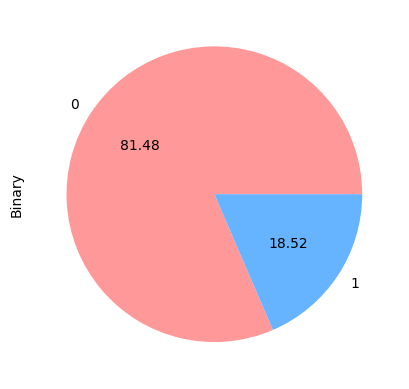

In [ ]:
colors = ['#ff9999','#66b3ff']
y.value_counts().plot.pie(autopct='%.2f',colors=colors)

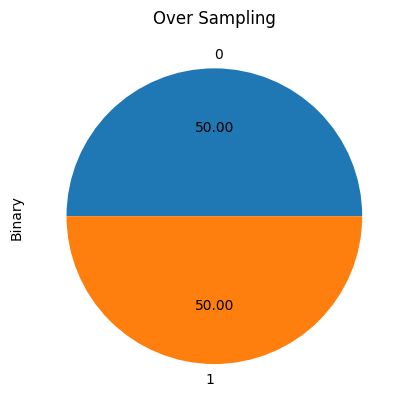

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resampled = RandomOverSampler(sampling_strategy="auto")
X_resampled, y_resampled = resampled.fit_resample(X, y)

ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over Sampling")
plt.show()

In [ ]:
y_resampled.value_counts()

0    198
1    198
Name: Binary, dtype: int64

# 07) Use the Random Forest classifier (Ensemble technique) and discuss the result by comparing the previous four methods.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
print_model_performance(rf_classifier,X_test,y_test)

Accuracy score:
 0.8979591836734694
Confusion matrix:
 [[42  1]
 [ 4  2]]
Classification report:
               precision    recall  f1-score   support

           0     0.9130    0.9767    0.9438        43
           1     0.6667    0.3333    0.4444         6

    accuracy                         0.8980        49
   macro avg     0.7899    0.6550    0.6941        49
weighted avg     0.8829    0.8980    0.8827        49

Precision:
 0.6666666666666666
Recall:
 0.3333333333333333


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier()


grid_values = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']

}

cross_validation = KFold(n_splits=5, shuffle=True)
rfc_grid = GridSearchCV(rf_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro', verbose=1)

desc = rfc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(rfc_grid, X_test, y_test)

print("\n The best parameters across all the searched params:\n", rfc_grid.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=1)
Accuracy score:
 0.8979591836734694
Confusion matrix:
 [[42  1]
 [ 4  2]]
Classification report:
               precision    recall  f1-score   support

           0     0.9130    0.9767    0.9438        43
           1     0.6667    0.3333    0.4444         6

    accuracy                         0.8980        49
   macro avg     0.7899    0.6550    0.6941        49
weighted avg     0.8829    0.8980    0.8827        49

Precision:
 0.6666666666666666
Recall:
 0.3333

**Random Forest provided a better balance between the precision and recall for class 1 it performs better than other classfiers**

# 08) Use the XGBoost classifier (Goosting technique) and compare results with the previous five techniques

In [ ]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier()
xgb_classifier.fit(X_train,y_train)
print_model_performance(xgb_classifier,X_test,y_test)

Accuracy score:
 0.8163265306122449
Confusion matrix:
 [[39  4]
 [ 5  1]]
Classification report:
               precision    recall  f1-score   support

           0     0.8864    0.9070    0.8966        43
           1     0.2000    0.1667    0.1818         6

    accuracy                         0.8163        49
   macro avg     0.5432    0.5368    0.5392        49
weighted avg     0.8023    0.8163    0.8090        49

Precision:
 0.2
Recall:
 0.16666666666666666


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier

xgb_classifier=XGBClassifier()


grid_values = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']

}

cross_validation = KFold(n_splits=5, shuffle=True)
xgbc_grid = GridSearchCV(xgb_classifier, param_grid=grid_values, cv=cross_validation, n_jobs=-1, scoring='f1_macro', verbose=1)

desc = xgbc_grid.fit(X_train, y_train)
print(desc)
print_model_performance(xgbc_grid, X_test, y_test)

print("\n The best parameters across the all searched params:\n", xgbc_grid.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[16:21:56] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     i...
                                     max_leaves=None, min_child_weight=None,
           

**XGBoost had a moderate accuracy but struggled with precision and recall for Class 1, similar to Decision Tree.Randomforest provides a better performance**